## Analysing human behaviour

This notebook reproduces behavioural performance analyses on the human data from the section _Visual manipulations trigger recurrent processing_.

In [14]:
# General package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import json

In [4]:
# Import some useful lists
external_list_file = '../data/external/lists.json'

# Read the json lists from the external list file
lists = json.load(open(external_list_file))

# Extract the relevant lists from the data
tasks = lists['tasks']

Define a function to get a star pattern from a p-value.

In [9]:
def p_to_star(pvalue):
    '''Takes a p value and returns the corresponding significance stars.'''
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

Aggregate the data in a dataframe.

In [17]:
# Load the data
perf_data = pd.read_pickle('../data/processed/perf_vectors.pkl')
human_data = pd.read_pickle('../data/processed/human_bh_results.pkl')
# Report the different data of interest in a dataframe
df = pd.DataFrame({
    'task': tasks,
    # extract accuracy data
    'average accuracy': perf_data['accuracy'],
    'sem average accuracy': perf_data['sem accuracy'],
    'mask accuracy': perf_data['mask accuracy'],
    'sem mask accuracy': perf_data['sem mask accuracy'],
    'no mask accuracy': perf_data['no mask accuracy'],
    'sem no mask accuracy': perf_data['sem no mask accuracy'],
    # extract RT data
    'average RT': perf_data['RT'],
    'sem average RT': perf_data['sem RT'],
    'mask RT': perf_data['mask RT'],
    'sem mask RT': perf_data['sem mask RT'],
    'no mask RT': perf_data['no mask RT'],
    'sem no mask RT': perf_data['sem no mask RT']
})

Split the tasks in easy and hard based on a threshold, and perform a t-test on the average accuracy across levels of masking.

In [6]:
# Sort the df by average accuracy
df = df.sort_values(by='no mask accuracy', ascending=False, ignore_index=True)

# Perform a paired t test to check for significant differences across masking
_, p_value_acc = ttest_rel(df['mask accuracy'], df['no mask accuracy'])
_, p_value_rt = ttest_rel(df['mask RT'], df['no mask RT'])

# Sort tasks in easy or challenging based on a threshold of accuracy
THRESHOLD = 0.9
df['group'] = df['mask accuracy'].apply(lambda x: 'easy' if x >= THRESHOLD else 'hard')

# Check if there are differences in accuracy across masking for each group of tasks
_, p_value_acc_easy = ttest_rel(df[df['group']=='easy']['mask accuracy'], df[df['group']=='easy']['no mask accuracy'])
_, p_value_acc_hard = ttest_rel(df[df['group']=='hard']['mask accuracy'], df[df['group']=='hard']['no mask accuracy'])

Print the results of the analysis.

In [7]:
print(
    f"The acurracy with mask and without mask is not sigificantly different in the easy condition (p={p_value_acc_easy})\n",
    f"The acurracy with mask and without mask is significantly different in the hard condition (p={p_value_acc_hard})"
)

The acurracy with mask and without mask is not sigificantly different in the easy condition (p=0.20081031255500256)
 The acurracy with mask and without mask is significantly different in the hard condition (p=0.0028896591569631575)


In [8]:
# Import some useful lists
external_list_file = '../data/external/lists.json'

# Read the json lists from the external list file
lists = json.load(open(external_list_file))

# Extract the relevant lists from the data
tasks = lists['tasks']
categories = lists['categories']
task_names = lists['task_names']

Define some styling elements

In [10]:
NOMASK_COLOUR = '#9FD07D' # Light green like on the poster
MASK_COLOUR = '#2C750F' # Darker shade of that green
legend_fontsize = 10.0 # 18 for posters
marker_size = 3.0 # 10 for posters
err_bar_dict = dict(  # style elements for the error bars
  lw=2.0, # 12 for posters
  capsize=2.0, # 4 for posters
  capthick=1.0 # 1.2 for posters
)
bar_width = 0.1 # 0.3 for posters

Reproduce figure 3a.

Text(1.25, 0.51, '**')

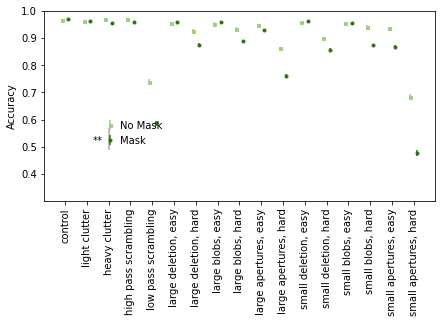

In [23]:
## Make a point plot with accuracy, with and without mask
fig, ax = plt.subplots(figsize=(7.0, 3.5))

# Plot the data with error bars
x = np.arange(len(df['task']))  # the label locations
offset = 0.15 # the dodge value between x points

ax.errorbar(x - offset, df['no mask accuracy'], yerr=df['sem no mask accuracy'], fmt='s',
            color=NOMASK_COLOUR, label='No Mask', markersize=marker_size)
ax.errorbar(x + offset, df['mask accuracy'], yerr=df['sem mask accuracy'], fmt='o',
            color=MASK_COLOUR, label='Mask', markersize=marker_size)

# Customize the axes
ax.set_ylabel('Accuracy')
ax.set_ylim(0.3, 1.0)
# Remove the first y tick
ax.set_yticks(ticks=ax.get_yticks()[1:])
ax.set_xticks(x)
# Extract task labels
x_labels = [task_names[task] for task in df['task'].values]
ax.set_xticklabels(x_labels, rotation=90)
# Draw the legend with the significance bar
ax.legend(fontsize = legend_fontsize, bbox_to_anchor=(0.12, 0.47), loc=2, handletextpad=0.0, frameon=False)
ax.vlines(x = 2.0, ymin = 0.49, ymax = 0.57, color = 'darkGray', linestyle='-', clip_on=False)
ax.text(1.25, 0.51, p_to_star(human_data['p value accuracy x mask']), fontsize = legend_fontsize)

Reproduce figure 3c.

Text(1.25, 725, 'ns')

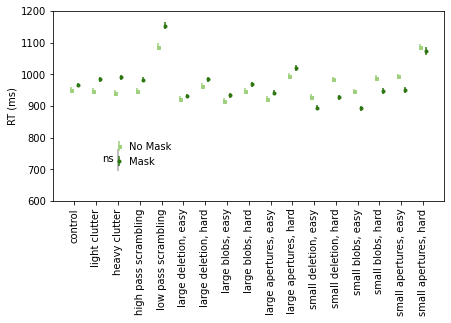

In [28]:
## Make a point plot with RT, with and without mask
fig, ax = plt.subplots(figsize=(7.0, 3.5))

# Plot the data with error bars
x = np.arange(len(df['task']))  # the label locations
offset = 0.15 # the dodge value between x points

ax.errorbar(x - offset, df['no mask RT'], yerr=df['sem no mask RT'], fmt='s', 
            color=NOMASK_COLOUR, label='No Mask', markersize=marker_size)
ax.errorbar(x + offset, df['mask RT'], yerr=df['sem mask RT'], fmt='o',
            color=MASK_COLOUR, label='Mask', markersize=marker_size)

# Customize the axes
ax.set_ylabel('RT (ms)')
ax.set_ylim(600, 1200)
# Remove the first y tick
# ax.set_yticks(ticks=ax.get_yticks()[1:])
ax.set_xticks(x)
# Extract task labels
x_labels = [task_names[task] for task in df['task'].values]
ax.set_xticklabels(x_labels, rotation=90)
# Draw the legend with the significance bar
ax.legend(fontsize = legend_fontsize, bbox_to_anchor=(0.12, 0.36), loc=2, handletextpad=0.0, frameon=False)
ax.vlines(x = 2.0, ymin = 730 - 35, ymax = 730 + 35, color = 'darkGray', linestyle='-', clip_on=False)
ax.text(1.25, 725, p_to_star(human_data['p value rt x mask']), fontsize = legend_fontsize)

Reproduce figure 3b.

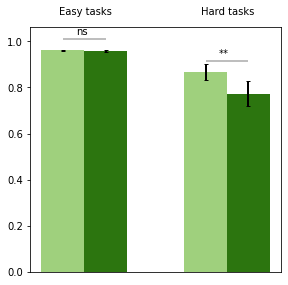

In [42]:
## Make a bar plot of accuracy per challenging/easy, per masking

# Group the data by 'group' and calculate the mean and SEM
grouped_mean = human_data['data'].groupby('group')[['no mask accuracy', 'mask accuracy']].mean()
grouped_sem = human_data['data'].groupby('group')[['no mask accuracy', 'mask accuracy']].sem()

# Plotting
fig, ax = plt.subplots(figsize=(4.5, 4.5))

x = np.arange(len(grouped_mean)) / 3 # the label locations

# Create bars with error bars
bars1 = ax.bar(x - bar_width/2, grouped_mean['no mask accuracy'], bar_width, color=NOMASK_COLOUR,
               yerr=grouped_sem['no mask accuracy'], label='No Mask',
               error_kw= err_bar_dict)
bars2 = ax.bar(x + bar_width/2, grouped_mean['mask accuracy'], bar_width, color=MASK_COLOUR,
               yerr=grouped_sem['mask accuracy'], label='Mask',
               error_kw= err_bar_dict)

# Customize the plot
ax.set_xticks(x)
# ax.set_xticklabels(['Easy \nmanipulations', 'Hard \nmanipulations'], fontsize=10, color='black', ha='left')
ax.set_xticklabels([])

# Add significance bars
ax.hlines(grouped_mean.loc[grouped_mean.index=='easy', 'no mask accuracy'] + 0.05,
          xmin = ax.get_xticks()[0]-bar_width/2, xmax = ax.get_xticks()[0]+bar_width/2,
          color = 'darkGray', linestyle='-', clip_on=False)
ax.text(ax.get_xticks()[0] - 0.02, grouped_mean.loc[grouped_mean.index=='easy', 'no mask accuracy'] + 0.07,
        p_to_star(human_data['p value accuracy x mask, easy']), fontsize = legend_fontsize)
# Give a small title to the left side
ax.text(ax.get_xticks()[0] - 0.06, grouped_mean.loc[grouped_mean.index=='hard', 'no mask accuracy'] + 0.25,
        "Easy tasks", fontsize = legend_fontsize)
ax.hlines(grouped_mean.loc[grouped_mean.index=='hard', 'no mask accuracy'] + 0.05,
          xmin = ax.get_xticks()[1]-bar_width/2, xmax = ax.get_xticks()[1]+bar_width/2,
          color = 'darkGray', linestyle='-', clip_on=False)
ax.text(ax.get_xticks()[1] - 0.02, grouped_mean.loc[grouped_mean.index=='hard', 'no mask accuracy'] + 0.07,
        p_to_star(human_data['p value accuracy x mask, hard']), fontsize = legend_fontsize)
# Give a small title to the right side
ax.text(ax.get_xticks()[1] - 0.06, grouped_mean.loc[grouped_mean.index=='hard', 'no mask accuracy'] + 0.25,
        "Hard tasks", fontsize = legend_fontsize)

# Remove the x ticks
ax.tick_params(axis='x', which='both', length=0)  # 'length=0' hides the ticks

Reproduce figure 3d.

Text(0, 0.5, 'Average RT')

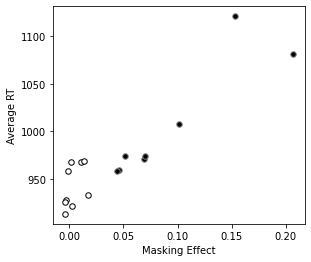

In [48]:
# Make a scatter plot of masking effect x average RT

# Define the colours & labels
colors = {'easy': 'white', 'hard': 'black'}
edgecolors = {'easy': 'black', 'hard': 'gray'}
labels = {'easy': 'Easy manipulations', 'hard': 'Hard manipulations'}

# Plotting
fig, ax = plt.subplots(figsize=(4.5, 4.0))

# Scatter plot
for group in human_data['data']['group'].unique():
    group_data = human_data['data'][human_data['data']['group'] == group]
    ax.scatter(group_data['masking effect'], group_data['average RT'], color=colors[group],
               s=marker_size*10, alpha=1.0, label = labels[group], edgecolor=edgecolors[group])

# Customize the plot
ax.set_xlabel('Masking Effect')
ax.set_ylabel('Average RT')